In [23]:
pip install mp-api

In [24]:
import csv
import pandas as pd
with open("/content/5_numerical_data.csv", 'r') as file:
  df = pd.read_csv("/content/5_numerical_data.csv")

                                                nsites  nelements    volume  \
nsites                                        1.000000   0.452974  0.857914   
nelements                                     0.452974   1.000000  0.298798   
volume                                        0.857914   0.298798  1.000000   
density                                      -0.388793  -0.453472 -0.325880   
density_atomic                               -0.157073  -0.240677  0.146239   
energy_per_atom                               0.206766   0.346134  0.196242   
formation_energy_per_atom                    -0.161308  -0.324364 -0.065325   
energy_above_hull                             0.020961   0.045620  0.030325   
is_stable                                    -0.168643  -0.135558 -0.097393   
equilibrium_reaction_energy_per_atom          0.114183   0.217000  0.099219   
band_gap                                      0.327307   0.389988  0.199083   
cbm                                          -0.1388

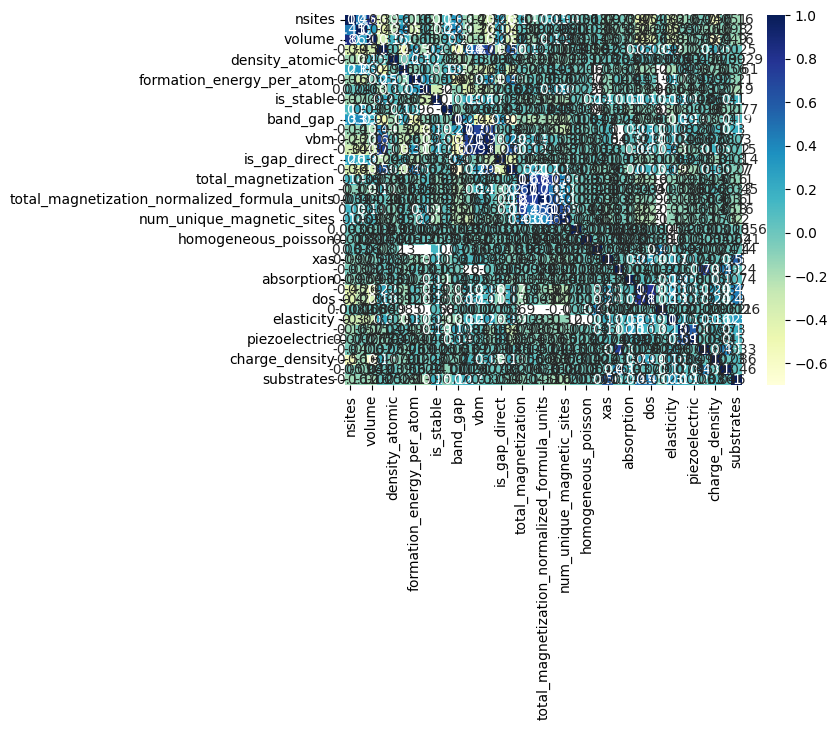

In [28]:
# Import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
from sklearn.feature_selection import RFE

# Print data that will be plotted
# Columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr(numeric_only=True))

# Plotting correlation heatmap
dataplot = sb.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Displaying heatmap
mp.show()
#nelements, nsites, volume, energy_per_atom, band_gap, is_metal, efermi, vbm

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Create the list of features below
# this is what you want to base your prediction off of.
# feature_names = ["nelements", "nsites", "volume", "energy_per_atom",  "is_metal", "efermi", "cbm", "vbm", "bandstructure"]

# Select data corresponding to features in feature_names
# X = df[feature_names]
X = df.drop(columns =["density"])
y = df["density"]

train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.2, random_state=1)

test_model = DecisionTreeRegressor(random_state=1)

rfe = RFE(test_model, n_features_to_select=10)
rfe.fit(train_X, train_y)

test_model.fit(train_X, train_y)


#specify the model.
#For model reproducibility, set a numeric value for random_state when specifying the model


#This is our model, it bases its decisions off of binary trees
#also radom_state=1 allows for slight randomness. Is good practice

#sets the model so it uses the features (X) to find our value we want to predict (y)

# saves the prediction results to predictions. .predict executes the prediction with the inserted data.

predictions = test_model.predict(val_X)


# Defines a model and uses it to fit a line of best fit for training data x and y
test_model = DecisionTreeRegressor(random_state=1)
test_model.fit(train_X, train_y)


# Predict with all validation observations
val_predictions = test_model.predict(val_X)

# using mae, mean absolute error, or the average error, we can see on average how far off our # model is
from sklearn.metrics import mean_absolute_error
# put in first the actual value, then the predicted values
val_mae = mean_absolute_error(val_y, val_predictions)

# Instead of accuracy_score, use metrics suitable for regression:
# mean squared error (MSE) and R-squared (R2)
mse = mean_squared_error(val_y, val_predictions)
r2 = r2_score(val_y, val_predictions)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)
print("Mean Absolute Error: ", val_mae)

/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py:2153: RuntimeWarning: overflow encountered in cast
  arr = np.asarray(values, dtype=dtype)


ValueError: Input X contains infinity or a value too large for dtype('float32').

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

#Check for and handle categorical variables
label_encoder = LabelEncoder()

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=20, random_state=42, oob_score=True)
# train_X, val_X, train_y, val_y
regressor.fit(train_X, train_y)
# Fit the regressor with x and y data

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=20, oob_score=True, random_state=42)

In [18]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Access the OOB Score
# OOB Score is the number of correctly predicted data on OOB samples taken for validation, you want less than 1%
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
# train_X, val_X, train_y, val_y
# Making predictions on the same data or new data
predictions = regressor.predict(val_X)

# Evaluating the model
mse = mean_squared_error(val_y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(val_y, predictions)
print(f'R-squared: {r2}')

# using mae, mean absolute error, or the average error, we can see on average how far off our # model is

val_mae = mean_absolute_error(val_y, predictions)
print("Mean Absolute Error: ", val_mae)

Out-of-Bag Score: 0.6965203515813791
Mean Squared Error: 2.442728392059354
R-squared: 0.7243247537238845
Mean Absolute Error:  1.117282672887628


In [ ]:
df['band_gap'].describe()

,band_gap
count,49772.000000
mean,1.341899
std,1.739477
min,0.000000
25%,0.000000
50%,0.265150
75%,2.443400
max,17.891400


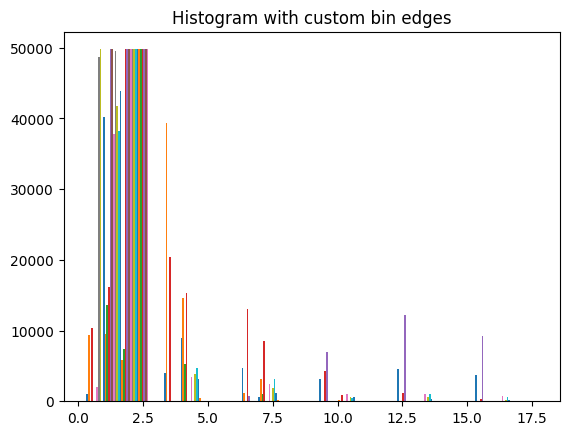

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# # Method 1: Specify the number of bins
# plt.hist(df, bins = 7)
# plt.title("Histogram with 10 bins")
# plt.show()

plt.hist(df, bins=[ 0, 3, 6, 9,12,15,18])
plt.title("Histogram with custom bin edges")
plt.show()

